# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Analyis
Observed Trends
1.  
2.  
3.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Creating base url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# Creating empty list and defining counter
city_list = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
city_counter = 0
set_counter = 1

# Print initial string
print("Beginning Data Retrieval ")
print("-----------------------------")

# Looping through each city to get data and then appending the data to the empty lists above..
for index, city in enumerate(cities, start = 1):
    try:
        # JSON
        response = requests.get(query_url + city).json()
        
        # Append
        city_list.append(response["name"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
        if city_counter > 49:
            city_counter = 0
            set_counter = set_counter + 1
    
        else:
            city_counter = city_counter + 1
            
        print(f"Processing Record {city_counter} of Set {set_counter} | {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 | tuatapere
Processing Record 2 of Set 1 | jiuquan
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | clyde river
Processing Record 5 of Set 1 | dryden
Processing Record 6 of Set 1 | saskylakh
Processing Record 7 of Set 1 | torbay
Processing Record 8 of Set 1 | yulara
Processing Record 9 of Set 1 | makakilo city
Processing Record 10 of Set 1 | anadyr
Processing Record 11 of Set 1 | marsabit
Processing Record 12 of Set 1 | salalah
Processing Record 13 of Set 1 | markova
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | peniche
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | san quintin
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | lagos
Processing Record 21 of Set 1 | khatanga
Processing Record 22 of Set 1 | russell
Processing Record 23 of Set 1 | butaritari
City not fo

Processing Record 37 of Set 4 | salinopolis
Processing Record 38 of Set 4 | ribeira grande
Processing Record 39 of Set 4 | hasaki
Processing Record 40 of Set 4 | kloulklubed
Processing Record 41 of Set 4 | kavieng
Processing Record 42 of Set 4 | bairiki
Processing Record 43 of Set 4 | dogondoutchi
Processing Record 44 of Set 4 | talnakh
Processing Record 45 of Set 4 | port hardy
Processing Record 46 of Set 4 | rio grande
Processing Record 47 of Set 4 | zhangye
Processing Record 48 of Set 4 | brae
Processing Record 49 of Set 4 | rocha
City not found. Skipping...
Processing Record 50 of Set 4 | vila franca do campo
Processing Record 0 of Set 5 | moorhead
City not found. Skipping...
Processing Record 1 of Set 5 | rawson
Processing Record 2 of Set 5 | flagstaff
Processing Record 3 of Set 5 | dingalan
Processing Record 4 of Set 5 | carballo
City not found. Skipping...
City not found. Skipping...
Processing Record 5 of Set 5 | cabo san lucas
Processing Record 6 of Set 5 | los llanos de arida

Processing Record 20 of Set 8 | varadero
Processing Record 21 of Set 8 | pangai
City not found. Skipping...
Processing Record 22 of Set 8 | sobolevo
Processing Record 23 of Set 8 | port shepstone
Processing Record 24 of Set 8 | merauke
Processing Record 25 of Set 8 | batemans bay
Processing Record 26 of Set 8 | taoudenni
Processing Record 27 of Set 8 | kousseri
Processing Record 28 of Set 8 | lichuan
Processing Record 29 of Set 8 | catumbela
Processing Record 30 of Set 8 | tilichiki
Processing Record 31 of Set 8 | arona
City not found. Skipping...
Processing Record 32 of Set 8 | severomuysk
Processing Record 33 of Set 8 | salvador
Processing Record 34 of Set 8 | pyu
Processing Record 35 of Set 8 | killam
Processing Record 36 of Set 8 | christchurch
Processing Record 37 of Set 8 | halifax
Processing Record 38 of Set 8 | luderitz
Processing Record 39 of Set 8 | tsuruoka
Processing Record 40 of Set 8 | wladyslawowo
Processing Record 41 of Set 8 | atakpame
Processing Record 42 of Set 8 | y

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Creating a Pandas dataframe with the data above
city_df = pd.DataFrame({"City": city_list, "Lat": latitude, "Lng": longitude, "Max Temp": max_temp,
                          "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed": wind_speed,
                          "Country": country, "Date": date})
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuatapere,-46.1333,167.6833,59.88,61,20,9.48,NZ,1649631780
1,Jiuquan,39.7432,98.5174,39.63,35,80,8.19,CN,1649631780
2,Rikitea,-23.1203,-134.9692,79.54,72,3,17.76,PF,1649631780
3,Clyde River,70.4692,-68.5914,-0.17,92,75,4.61,CA,1649631780
4,Dryden,49.7833,-92.7503,41.29,81,100,5.75,CA,1649631655
...,...,...,...,...,...,...,...,...,...
545,Cairns,-16.9167,145.7667,85.06,91,75,11.50,AU,1649631954
546,Evensk,61.9500,159.2333,11.28,67,82,10.47,RU,1649631954
547,Caravelas,-17.7125,-39.2481,78.17,84,46,6.53,BR,1649631954
548,Hofn,64.2539,-15.2082,36.01,67,100,2.66,IS,1649631792


In [5]:
# Export City data into a .csv file
city_df.to_csv("city.csv", index = False, header = True)
city_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [6]:
# Group By dataframe: count, mean, std, min, 25%, 50%, 75%, max
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.068457,20.085614,59.033491,72.050909,58.338182,8.447909,1.649632e+09
std,33.059589,91.940947,22.991742,21.721393,38.655102,6.008276,9.520418e+01
min,-54.800000,-175.200000,-14.850000,1.000000,0.000000,0.000000,1.649631e+09
25%,-8.436275,-63.470600,41.392500,63.000000,20.000000,3.680000,1.649632e+09
50%,22.481900,23.892700,65.200000,77.000000,72.000000,6.910000,1.649632e+09
75%,46.433375,102.441375,77.050000,88.000000,99.000000,12.120000,1.649632e+09
max,78.218600,179.316700,98.200000,100.000000,100.000000,36.820000,1.649632e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
# Checking how many cities with Humidity over 100 %
city_df.loc[city_df["Humidity"]>= 100]['Humidity'].count()

9

In [15]:
# Comparing cities under and over 100% Humidity
city_df_filtered = city_df.loc[city_df['Humidity']<100]
print(len(city_df_filtered))
print(len(city_df))

541
550


In [16]:
# Print filtered table
city_df_filtered.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,5.410000e+02
mean,18.594758,19.872717,59.483845,71.585952,57.691312,8.377246,1.649632e+09
std,32.784586,92.352589,22.660315,21.597379,38.632539,5.935201,9.560806e+01
min,-54.800000,-175.200000,-14.850000,1.000000,0.000000,0.000000,1.649631e+09
25%,-8.767600,-64.261500,42.580000,63.000000,20.000000,3.670000,1.649632e+09
50%,21.850000,23.033300,65.320000,76.000000,70.000000,6.910000,1.649632e+09
75%,45.616900,102.799400,77.230000,87.000000,98.000000,11.680000,1.649632e+09
max,78.218600,179.316700,98.200000,99.000000,100.000000,36.820000,1.649632e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.
humidity_over_100 = city_df[city_df.Humidity > 100].index
humidity_over_100

Int64Index([], dtype='int64')

In [23]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_df_filtered
for x in humidity_over_100:
    clean_city_data = city_df.drop([x])
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuatapere,-46.1333,167.6833,59.88,61,20,9.48,NZ,1649631780
1,Jiuquan,39.7432,98.5174,39.63,35,80,8.19,CN,1649631780
2,Rikitea,-23.1203,-134.9692,79.54,72,3,17.76,PF,1649631780
3,Clyde River,70.4692,-68.5914,-0.17,92,75,4.61,CA,1649631780
4,Dryden,49.7833,-92.7503,41.29,81,100,5.75,CA,1649631655
...,...,...,...,...,...,...,...,...,...
545,Cairns,-16.9167,145.7667,85.06,91,75,11.50,AU,1649631954
546,Evensk,61.9500,159.2333,11.28,67,82,10.47,RU,1649631954
547,Caravelas,-17.7125,-39.2481,78.17,84,46,6.53,BR,1649631954
548,Hofn,64.2539,-15.2082,36.01,67,100,2.66,IS,1649631792


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs in the output_data folder
* Below are examples of what you should get but your results will be different.

## Latitude vs. Temperature Plot

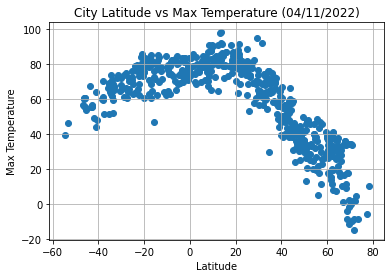

In [83]:
# Latitude vs Tempearture Plot
plt.scatter(latitude, max_temp)

plt.title("City Latitude vs Max Temperature (04/11/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid()

plt.savefig("City Latitude vs Max Temperature Plot")
plt.show()

## Latitude vs. Humidity Plot

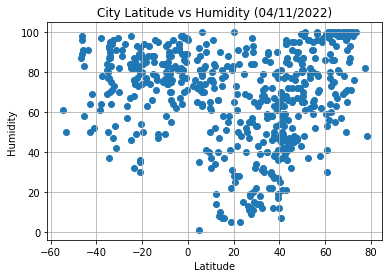

In [75]:
# Latitude vs Humidity Plot
plt.scatter(latitude, humidity)

plt.title("City Latitude vs Humidity (04/11/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

plt.savefig("City Latitude vs Humidity Plot")
plt.show()

## Latitude vs. Cloudiness Plot

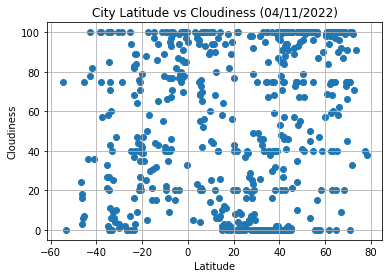

In [76]:
# Latitude vs Cloudiness Plot
plt.scatter(latitude, cloudiness)

plt.title("City Latitude vs Cloudiness (04/11/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

plt.savefig("City Latitude vs Cloudiness Plot")
plt.show()

## Latitude vs. Wind Speed Plot

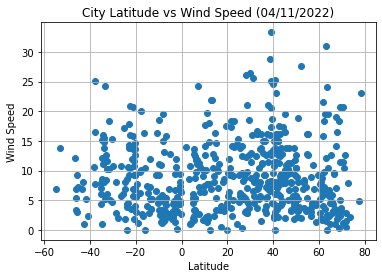

In [80]:
# Latitude vs Wind Speed Plot
plt.scatter(latitude, wind_speed)

plt.title("City Latitude vs Wind Speed (04/11/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

plt.savefig("City Latitude vs Wind Speed Plot")
plt.show()

## Linear Regression

In [84]:
# Creating norhtern and southern hemisphere
northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0]
southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0]
# northern_hemisphere
# southern_hemisphere

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.9029442412407465


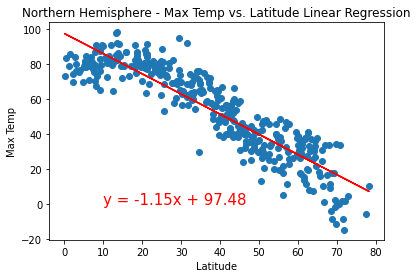

In [56]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (10,0), fontsize = 15, color = "red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Printing r-value
print(f"The r-value is: {rvalue}")

# Saving graph
plt.savefig("Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6842643352771202


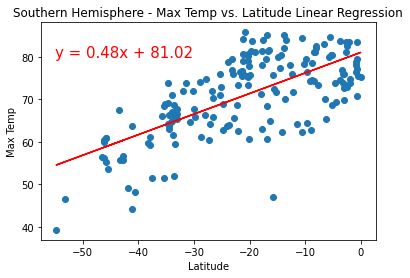

In [65]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (-55,80), fontsize = 15, color = "red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Printing r-value
print(f"The r-value is: {rvalue}")

# Saving graph
plt.savefig("Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2545053739807167


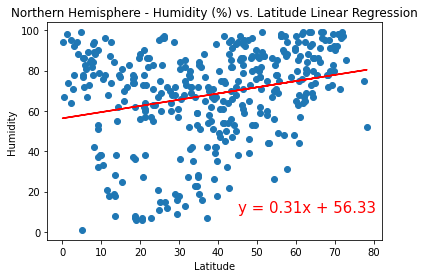

In [70]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (45,10), fontsize = 15, color = "red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

# Printing r-value
print(f"The r-value is: {rvalue}")

# Saving graph
plt.savefig("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3257089186552947


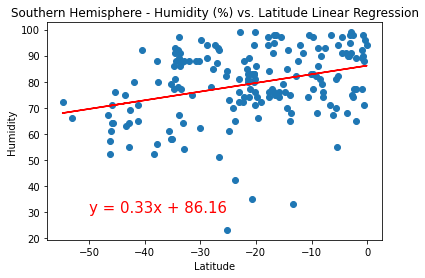

In [72]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (-50,30), fontsize = 15, color = "red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

# Printing r-value
print(f"The r-value is: {rvalue}")

# Saving graph
plt.savefig("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.28587906000559227


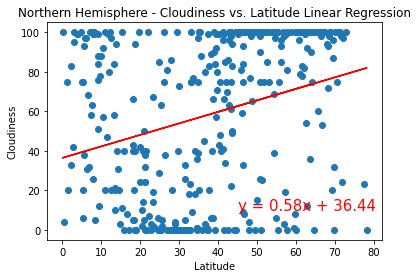

In [73]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (45,10), fontsize = 15, color = "red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')

# Printing r-value
print(f"The r-value is: {rvalue}")

# Saving graph
plt.savefig("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.29652848337944876


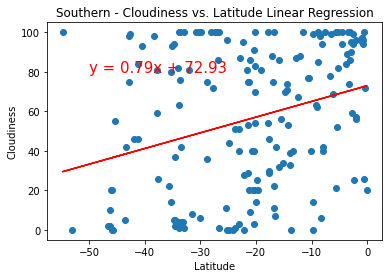

In [76]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (-50,80), fontsize = 15, color = "red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern - Cloudiness vs. Latitude Linear Regression')

# Printing r-value
print(f"The r-value is: {rvalue}")

# Saving graph
plt.savefig("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.005704984167874111


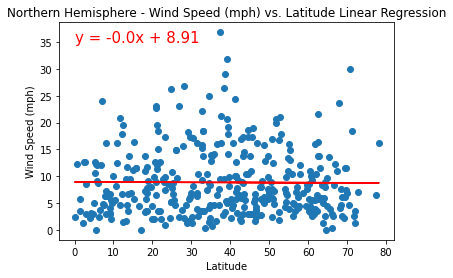

In [78]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (0,35), fontsize = 15, color = "red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

# Printing r-value
print(f"The r-value is: {rvalue}")

# Saving graph
plt.savefig("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.18519287139936697


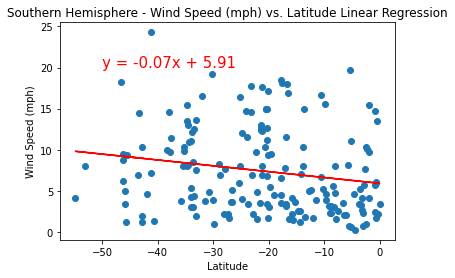

In [80]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (-50,20), fontsize = 15, color = "red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

# Printing r-value
print(f"The r-value is: {rvalue}")

# Saving graph
plt.savefig("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()